# Extract vegetation variables times series 



## Setup Environment

In [1]:
# Provide your GEE authentificaton
import ee
ee.Authenticate()
ee.Initialize()

In [2]:
import LEAF_v0 as LEAF
import SL2PV0 
import SL2PV1
import numpy as np
from datetime import datetime
import pandas as pd
import os
from datetime import datetime
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'LEAF_v0'

In [ ]:
#--ServerApp.iopub_data_rate_limit=3000000.0

In [ ]:
# renames columns of in-situ validation samples to standard names
def renameColumns(siteDF,site_name) :
    if 'GBOV' in os.path.split(os.path.abspath(site_name))[-1]:   
        siteDF['network'] = 'GBOV'
        newNames = {'Site': 'Site', \
                        'FCOVER_down': 'fCOVER_down', \
                        'FCOVER_up': 'fCOVER_up', \
                        'FCOVER_down_err': 'fCOVER_down_err', \
                        'FCOVER_up_err': 'fCOVER_up_err', \
                        'FIPAR_down': 'fAPAR_down', \
                        'FIPAR_up': 'fAPAR_up', \
                        'FIPAR_down_err': 'fAPAR_down_err', \
                        'FIPAR_up_err': 'fAPAR_up_err', \
                        'LAI_Warren_up': 'PAI_up', \
                        'LAI_Warren_down': 'PAI_down', \
                        'LAIe_Warren_up': 'PAIe_up', \
                        'LAIe_Warren_down': 'PAIe_down', \
                        'LAIe_Miller_up': 'PAIe_Miller_up', \
                        'LAIe_Miller_down': 'PAIe_Miller_down', \
                        'LAI_Warren_up_err': 'PAI_up_err', \
                        'LAI_Warren_down_err': 'PAI_down_err', \
                        'LAIe_Warren_up_err': 'PAIe_up_err', \
                        'LAIe_Warren_down_err': 'PAIe_down_err', \
                        'LAIe_Miller_up_err': 'PAIe_Miller_up_err', \
                        'LAIe_Miller_down_err': 'PAIe_Miller_down_err'} 
    elif 'CCRS' in os.path.split(os.path.abspath(site_name))[-1]:
        siteDF['network'] = 'CCRS'
        siteDF['IGBP_class'] = 'Mixed Forest'
        siteDF.loc[siteDF['BF']>0.75,'IGBP_class'] = 'Deciduous Broadleaf'
        siteDF.loc[siteDF['BF']<0.25,'IGBP_class'] = 'Evergreen Needleleaf'
        newNames = {'Location': 'Site', \
                    'BF' : 'fBroadleaf' , \
                    'NF': 'fNeedleafleaf' , \
                    'fcover_Down': 'fCOVER_down', \
                    'fcover_Up': 'fCOVER_up', \
                    'fcoverstd_Down': 'fCOVER_down_err', \
                    'fcoverstd_Up': 'fCOVER_up_err', \
                    'Daily_Integrated_Black_Sk_yfAPAR_Down': 'fAPAR_down', \
                    'Daily_Integrated_Black_Sk_yfAPAR_Up': 'fAPAR_up' , \
                    'Daily_Integrated_Black_Sky_fAPAR_Down': 'fAPAR_down', \
                    'Daily_Integrated_Black_Sky_fAPAR_Up': 'fAPAR_up' , \
                    'PAICEV61_Up': 'PAI_up', \
                    'PAICEV61_Down': 'PAI_down', \
                    'PAIeCEV61_Up': 'PAIe_up', \
                    'PAIeCEV61_Down':'PAIe_down', \
                    'PAIEMiller_Up': 'PAIe_Miller_up', \
                    'PAIEMiller_Down':'PAIe_Miller_down', \
                    'Woody_Fraction_average':'WAItoPAIratio', \
                    'Woody_Fraction_std': 'WAItoPAIratio_std' }  

    elif 'NEON' in os.path.split(os.path.abspath(site_name))[-1]:
        siteDF['network'] = 'NEON'
        newNames = {'SITE': 'Site', \
                    'PLOT_ID':'PlotID',\
                    'nlcd':'NLCD_class',\
                    'clumping_index_Miller_understoryest' : 'clumping_Miller_down' , \
                    'clumping_index_Miller_understoryerror': 'clumping_Miller_down_err' , \
                    'clumping_index_Miller_overstoryest': 'clumping_Miller_up', \
                    'clumping_index_Miller_overstoryerror': 'clumping_Miller_up_err', \
                    'clumping_index_Warren_understoryest': 'clumping_Warren_down', \
                    'clumping_index_Warren_understoryerror': 'clumping_Warren_down_err', \
                    'clumping_index_Warren_overstoryest': 'clumping_Warren_up', \
                    'clumping_index_Warren_overstoryerror': 'clumping_Warren_up_err' , \
                    'datetime': 'Date', \
                    'understory_flag': 'down_flag' , \
                    'FIPAR_understoryest': 'fAPAR_down', \
                    'FIPAR_understoryerror': 'fAPAR_down_err', \
                    'FIPAR_overstoryest': 'fAPAR_up', \
                    'FIPAR_overstoryerror':'fAPAR_up_err', \
                    'FCOVER_understoryest': 'fCOVER_down', \
                    'FCOVER_understoryerror':'fCOVER_down_err', \
                    'FCOVER_overstoryest':'fCOVER_up', \
                    'FCOVER_overstoryerror': 'fCOVER_up_err', \
                    
                    'true_LAI_Miller_understoryest':'PAI_Miller_down', \
                    'true_LAI_Miller_understoryerror':'PAI_Miller_down_err', \
                    'true_LAI_Miller_overstoryest':'PAI_Miller_up', \
                    'true_LAI_Miller_overstoryerror':'PAI_Miller_up_err', \
                    'true_LAI_Warren_understoryest':'PAI_Warren_down', \
                    'true_LAI_Warren_understoryerror':'PAI_Warren_down_err', \
                    'true_LAI_Warren_overstoryest':'PAI_Warren_up', \
                    'true_LAI_Warren_overstoryerror':'PAI_Warren_up_err', \
                    
                    'effective_LAI_Miller_understoryest':'PAIe_down', \
                    'effective_LAI_Miller_understoryerror':'PAIe_down_err', \
                    'effective_LAI_Miller_overstoryest':'PAIe_up', \
                    'effective_LAI_Miller_overstoryerror':'PAIe_up_err', \
                    'effective_LAI_Warren_understoryest':'PAIe_Warren_down', \
                    'effective_LAI_Warren_understoryerror':'PAIe_Warren_down_err', \
                    'effective_LAI_Warren_overstoryest':'PAIe_Warren_up', \
                    'effective_LAI_Warren_overstoryerror':'PAIe_Warren_up_err', \
                    'PLOT_ID':'PLOT_ID', \
                    'timeStart':'timeStart', \
                    'overstory_flag':'up_flag', \
                    'combined_flag':'combined_flag'}
                    
    return  siteDF.rename(columns = newNames)

In [ ]:
def rename_nlcd_class (samplesDF) :
    if 'NEON' in np.unique(samplesDF['network']):
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'evergreenForest')           ,'NLCD_class'] = 'Evergreen Forest'
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'deciduousForest')           ,'NLCD_class'] = 'Deciduous Forest' 
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'mixedForest')               ,'NLCD_class'] = 'Mixed Forest'
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'cultivatedCrops')           ,'NLCD_class'] = 'Cultivated Crops'
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'pastureHay')                ,'NLCD_class'] = 'Pasture Hay' 
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'dwarfScrub')                ,'NLCD_class'] = 'Dwarf Scrub'
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'shrubScrub')                ,'NLCD_class'] = 'Shrub Scrub' 
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'woodyWetlands')             ,'NLCD_class'] = 'Woody Wetlands' 
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'emergentHerbaceousWetlands'),'NLCD_class'] = 'Emergent Herbaceous Wetlands'
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'sedgeHerbaceous')           ,'NLCD_class'] = 'Sedge Herbaceous'
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'grasslandHerbaceous')       ,'NLCD_class'] = 'Grassland Herbaceous'
    return (samplesDF)

In [ ]:
def format_features(feat,variablename):
    for key in feat.keys():
        [key1,key2]=list(feat[key][0].keys())
        for idx,row in enumerate(feat[key]):
            row[key1].update({'sample%s'%(variablename):row[key2]})
            feat[key][idx]=row[key1]
    return feat 

In [ ]:
def estimateWAItoPAIratio(samplesDF) :
    #estimate overstory woody to total area ratio for NEON sites
    # use initial fixed ratio for all sites based on shrubs 

    if 'NEON' in np.unique(samplesDF['network']):
        samplesDF.loc[(samplesDF['network'] == 'NEON') ,'WAItoPAIratio'] = 0.10
        samplesDF.loc[(samplesDF['network'] == 'NEON') ,'WAItoPAIratio_std'] = 0.11
    
        # use fixed ratio for needeleaf sites
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'Evergreen Needleleaf'),'WAItoPAIratio'] = 0.16
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'Evergreen Needleleaf'),'WAItoPAIratio_std'] = 0.10   
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'Deciduous Needleleaf'),'WAItoPAIratio'] = 0.16
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'Deciduous Needleleaf'),'WAItoPAIratio_std'] = 0.10  
    
        # use fixed ratio for  broadleaf sites
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'Evergreen Broadleaf'),'WAItoPAIratio'] = 0.24
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'Evergreen Broadleaf'),'WAItoPAIratio_std'] = 0.11
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'Deciduous Broadleaf'),'WAItoPAIratio'] = 0.24
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'Deciduous Broadleaf'),'WAItoPAIratio_std'] = 0.11
    
        # use fixed ratio for mixed forest
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'Mixed Forest'),'WAItoPAIratio'] = 0.18
        samplesDF.loc[(samplesDF['network'] == 'NEON') & (samplesDF['NLCD_class'] == 'Mixed Forest'),'WAItoPAIratio_std'] = 0.11
    return (samplesDF)

In [ ]:
def parseSampleFile(samplesDF,variableName,site_name):
# clumping uncertainty
    samplesDF = renameColumns(samplesDF,site_name)
    samplesDF=rename_nlcd_class(samplesDF)
    clumping_err = 0.025
    WAItoPAIdown= 0.1

    if variableName == 'LAI' :
        pai_algo='Miller' # choices: ['Miller','']
        samplesDF['PAI_up']=samplesDF['PAI_%s_up'%(pai_algo)]
        samplesDF['PAI_up_err']=samplesDF['PAI_%s_up_err'%(pai_algo)]
        samplesDF['PAI_down']=samplesDF['PAI_%s_down'%(pai_algo)]
        samplesDF['PAI_down_err']=samplesDF['PAI_%s_down_err'%(pai_algo)]
        
        samplesDF = estimateWAItoPAIratio(samplesDF)
        samplesDF[['PAI_up','PAI_down','PAIe_up','PAIe_down','PAI_up_err','PAI_down_err','PAIe_up_err','PAIe_down_err']] = samplesDF[['PAI_up','PAI_down','PAIe_up','PAIe_down','PAI_up_err','PAI_down_err','PAIe_up_err','PAIe_down_err']].apply(pd.to_numeric)
        samplesDF[['PAI_up','PAI_down','PAIe_up','PAIe_down','PAI_up_err','PAI_down_err','PAIe_up_err','PAIe_down_err']] = samplesDF[['PAI_up','PAI_down','PAIe_up','PAIe_down','PAI_up_err','PAI_down_err','PAIe_up_err','PAIe_down_err']].replace(-999, 0)
        
        #samplesDF['percentValid'] = samplesDF['numValid'].div(samplesDF['numSamples'])
        # add error due to uncertainty in clumping
        samplesDF['PAI_up_err_clumping'] = samplesDF['PAI_up'].mul(samplesDF['PAI_up'].div((samplesDF['PAIe_up']).add(0.0001)).mul(clumping_err))
        samplesDF['PAI_up_err'] = samplesDF['PAI_up_err'].pow(2).add(samplesDF['PAI_up_err_clumping'].pow(2)).pow(0.5)
        samplesDF['PAI_down_err_clumping'] = samplesDF['PAI_down'].mul(samplesDF['PAI_down'].div((samplesDF['PAIe_down']).add(0.0001)).mul(clumping_err))
        samplesDF['PAI_down_err'] = samplesDF['PAI_down_err'].pow(2).add(samplesDF['PAI_down_err_clumping'].pow(2)).pow(0.5)
         
        #compute total canopy values including woody area
        samplesDF['PAI_total'] = samplesDF['PAI_up'].add(samplesDF['PAI_down']) 
        samplesDF['PAI_total_err'] = samplesDF['PAI_up_err'].pow(2).add(samplesDF['PAI_down_err'].pow(2)).pow(0.5)
        samplesDF['PAIe_total'] = samplesDF['PAIe_up'].add(samplesDF['PAIe_down']) 
        samplesDF['PAIe_total_err'] = samplesDF['PAIe_up_err'].pow(2).add(samplesDF['PAIe_down_err'].pow(2)).pow(0.5)
        samplesDF['clumping_total'] = samplesDF['PAIe_total'].div(samplesDF['PAI_total'] ) 
        samplesDF['clumping_total_err']  = (2 * clumping_err  * clumping_err) ** (0.5)          
         #compute total canopy values depending to removing woddy area
        samplesDF = estimateWAItoPAIratio(samplesDF)
        samplesDF['LAI_up'] = samplesDF['PAI_up'] * (1-samplesDF['WAItoPAIratio'])
        samplesDF['LAI_up_err'] = samplesDF['PAI_up_err'] * (1-samplesDF['WAItoPAIratio'])
        samplesDF['LAI_down'] = samplesDF['PAI_down'] * ( 1 - WAItoPAIdown)
        samplesDF['LAI_down_err'] = samplesDF['PAI_down_err'] * ( 1 - WAItoPAIdown)
        samplesDF['LAI_total'] = samplesDF['LAI_up'] + samplesDF['LAI_down']
        samplesDF['LAI_total_err'] = samplesDF['LAI_down_err'].pow(2).add(samplesDF['LAI_up_err'].pow(2)).pow(0.5)                                                                           
        samplesDF['LAIe_up'] = samplesDF['PAIe_up'] * (1-samplesDF['WAItoPAIratio'])
        samplesDF['LAIe_up_err'] = samplesDF['PAIe_up_err'] * (1-samplesDF['WAItoPAIratio'])
        samplesDF['LAIe_down'] = samplesDF['PAIe_down'] * ( 1 - WAItoPAIdown)
        samplesDF['LAIe_down_err'] = samplesDF['PAIe_down_err'] * ( 1 - WAItoPAIdown)
        samplesDF['LAIe_total'] = samplesDF['LAIe_up'] + samplesDF['LAIe_down']
        samplesDF['LAIe_total_err'] = samplesDF['LAIe_down_err'].pow(2).add(samplesDF['LAIe_up_err'].pow(2)).add(samplesDF['LAI_up'].mul(samplesDF['LAI_up'].mul(samplesDF['WAItoPAIratio_std'])).pow(2)).pow(0.5)     

    elif variableName == 'fCOVER' :
        print('fcover')
        samplesDF = estimateWAItoPAIratio(samplesDF)
        samplesDF[['fCOVER_up','fCOVER_down','fCOVER_up_err','fCOVER_down_err']] = samplesDF[['fCOVER_up','fCOVER_down','fCOVER_up_err','fCOVER_down_err']].apply(pd.to_numeric)
        samplesDF [['fCOVER_up','fCOVER_down','fCOVER_up_err','fCOVER_down_err']]= samplesDF[['fCOVER_up','fCOVER_down','fCOVER_up_err','fCOVER_down_err']].replace(-999, 0)
        #samplesDF['percentValid'] = samplesDF['numValid'] / samplesDF['numSamples']
        samplesDF['fCOVER_up'] = samplesDF['fCOVER_up'] * (1-samplesDF['WAItoPAIratio'])
        samplesDF['fCOVER_down'] = samplesDF['fCOVER_down'] * ( 1 - WAItoPAIdown)
        samplesDF['fCOVER_total'] = samplesDF['fCOVER_up'].add((samplesDF['fCOVER_up'].mul(-1).add(1)).mul(samplesDF['fCOVER_down'] ))
        samplesDF['fCOVER_total_err'] = samplesDF['fCOVER_down_err'].pow(2).add(samplesDF['fCOVER_up_err'].pow(2)).add(samplesDF['fCOVER_up'].mul(samplesDF['fCOVER_up'].mul(samplesDF['WAItoPAIratio_std'])).pow(2)).pow(0.5)  

    elif  variableName == 'fAPAR' :
        samplesDF = estimateWAItoPAIratio(samplesDF)
        samplesDF[['fAPAR_up','fAPAR_down','fAPAR_up_err','fAPAR_down_err']] = samplesDF[['fAPAR_up','fAPAR_down','fAPAR_up_err','fAPAR_down_err']].apply(pd.to_numeric)
        samplesDF [['fAPAR_up','fAPAR_down','fAPAR_up_err','fAPAR_down_err']]= samplesDF[['fAPAR_up','fAPAR_down','fAPAR_up_err','fAPAR_down_err']].replace(-999, 0)
        samplesDF['fAPAR_up'] = samplesDF['fAPAR_up'] * (1-samplesDF['WAItoPAIratio'])
        samplesDF['fAPAR_down'] = samplesDF['fAPAR_down'] * ( 1 - WAItoPAIdown)
        #samplesDF['percentValid'] = samplesDF['numValid'] / samplesDF['numSamples']
        samplesDF['fAPAR_total'] = samplesDF['fAPAR_up'].add((samplesDF['fAPAR_up'].mul(-1).add(1)).mul(samplesDF['fAPAR_down'] ))
        # gap fill estimates of insitu error for CCRS
        samplesDF.loc[samplesDF['network'] == 'CCRS','fAPAR_up_err'] = samplesDF.loc[samplesDF['network'] == 'CCRS','fAPAR_up'].add(-0.5).abs().mul(-0.08437372).add(0.04791396358018562).mul(samplesDF.loc[samplesDF['network'] == 'CCRS','fAPAR_up']).div(samplesDF.loc[samplesDF['network'] == 'CCRS','fAPAR_total'])
        samplesDF.loc[samplesDF['network'] == 'CCRS','fAPAR_down_err'] = samplesDF.loc[samplesDF['network'] == 'CCRS','fAPAR_down'].add(-0.5).abs().mul(-0.08437372).add(0.04791396358018562).mul(samplesDF.loc[samplesDF['network'] == 'CCRS','fAPAR_down']).div(samplesDF.loc[samplesDF['network'] == 'CCRS','fAPAR_total'])
        samplesDF['fAPAR_total_err'] = samplesDF['fAPAR_down_err'].pow(2).add(samplesDF['fAPAR_up_err'].pow(2)).add(samplesDF['fAPAR_up'].mul(samplesDF['fAPAR_up'].mul(samplesDF['WAItoPAIratio_std'])).pow(2)).pow(0.5)  
    else :
        print('variable not found')     
    return samplesDF


## Specify Sites to Process

Sites correspond to readable Google Earth Engine Feature collections under which samples will be extracted.
If the features have time stamps as properties the sampling interval can be restricted on a feature by feature basis.
Otherwise the sampling interval must be specified the same for all features.

In [3]:
# List of GEE feature collections
siteList=["projects/sentinel2downloder/assets/test"]
datapath='C:/Djamai_Najib/1_vegetation_parameters/1_scripts/LEAF-Landsat-Validation-paper/data/NEON_times_series/'

In [4]:
fn='SCBI_062_deciduousForest_dataset.csv'
insitu=pd.read_csv(os.path.join(datapath,fn))

NameError: name 'pd' is not defined

In [57]:
# insitu

In [58]:
timevec=[datetime.strptime(tt, '%d/%m/%Y') for tt in insitu['timeStart']]
insitu['utc']=timevec

In [59]:
variableName='LAI'
site_name='NEON'
MES=parseSampleFile(insitu,variableName,site_name)

In [60]:
MES_select=MES[['utc','LAI_total','LAI_total_err','LAIe_total','LAIe_total_err']]
#MES_select=MES[['utc',variableName+'_total',variableName+'_total_err']]
MES_select

,utc,LAI_total,LAI_total_err,LAIe_total,LAIe_total_err
0,2021-09-09,5.778000,0.251700,4.176000,3.674542
1,2016-09-09,4.495315,0.228260,2.678566,2.224859
2,2022-05-09,2.241000,0.120837,1.557000,0.555062
3,2017-05-09,4.764835,0.203550,3.240674,1.047597
4,2019-04-09,0.500400,0.028707,0.409500,0.031508
...,...,...,...,...,...
119,2017-08-10,5.156238,0.237542,3.257600,2.926010
120,2018-07-10,5.809984,0.251018,3.775219,3.715063
121,2014-10-10,2.886377,0.148531,1.721486,0.918221
122,2022-08-01,6.309000,0.269955,4.608000,4.380464


In [61]:
sites_list=insitu.loc[[1,2]]['index']
sites_list=list(sites_list)

In [62]:
sites_list

[45, 259]

In [63]:
datapath

'C:/Djamai_Najib/1_vegetation_parameters/1_scripts/LEAF-Landsat-Validation-paper/data/NEON_times_series/'

In [68]:
sites_list

[45, 259]

## Run LEAF 

### Sample Surface Reflectance from various sensors over sites

In [65]:
sitesDictionaryS2LAI = LEAF.sampleSites(siteList, \
                                                imageCollectionName='COPERNICUS/S2_SR_HARMONIZED',\
                                                algorithm=SL2PV0, 
                                                variableName=variableName,\
                                                maxCloudcover=90,\
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 30,\
                                                bufferTemporalSize =["2018-01-01","2023-12-31"],  \
                                                subsamplingFraction = 0.99,\
                                                outputFileName=datapath,\
                                                feature_list=[sites_list[0]])

STARTING LEAF IMAGE for  COPERNICUS/S2_SR_HARMONIZED
Output path: C:/Djamai_Najib/1_vegetation_parameters/1_scripts/LEAF-Landsat-Validation-paper/data/NEON_times_series/test_COPERNICUS_S2_SR_HARMONIZED_LAI_45_45_2024_02_05_17h_02mn_26s.pkl
Site:  projects/sentinel2downloder/assets/test  with  1  features.
45
Feature n°: 45/1  -- startDate: 2018-01-01 00:00:00 -- endDate: 2023-12-31 00:00:00
----------------------------------------------------------------------------------------------------------


EEException: List.get: List index must be between 0 and 0, or -1 and -1.  Found 45.

In [66]:
sitesDictionaryS2LAI = LEAF.sampleSites(siteList, \
                                                imageCollectionName='COPERNICUS/S2_SR_HARMONIZED',\
                                                algorithm=SL2PV0, 
                                                variableName=variableName,\
                                                maxCloudcover=90,\
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 30,\
                                                bufferTemporalSize =["2018-01-01","2023-12-31"],  \
                                                subsamplingFraction = 0.99,\
                                                outputFileName=datapath,\
                                                feature_list=[sites_list[0]])

STARTING LEAF IMAGE for  COPERNICUS/S2_SR_HARMONIZED
Output path: C:/Djamai_Najib/1_vegetation_parameters/1_scripts/LEAF-Landsat-Validation-paper/data/NEON_times_series/test_COPERNICUS_S2_SR_HARMONIZED_LAI_45_45_2024_02_05_17h_02mn_38s.pkl
Site:  projects/sentinel2downloder/assets/test  with  1  features.
45
Feature n°: 45/1  -- startDate: 2018-01-01 00:00:00 -- endDate: 2023-12-31 00:00:00
----------------------------------------------------------------------------------------------------------


EEException: List.get: List index must be between 0 and 0, or -1 and -1.  Found 45.

In [21]:
# sitesDictionaryL08LAI
# import pickle

# with open(os.path.join(datapath,'NEON_2013-22_RMs_updated_parsed_L8_fAPAR_SL2PV1_GUAN_052_evergreenForest_datase.pkl'), 'rb') as f:
#     sitesDictionaryL08LAI_r = pickle.load(f)

# with open(os.path.join(datapath,'NEON_2013-22_RMs_updated_parsed_S2_fAPAR_SL2PV1_GUAN_052_evergreenForest_datase.pkl'), 'rb') as f:
#     sitesDictionaryS2LAI_r= pickle.load(f)

## Visualize Results

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
def format_feature(feat):
    D=dict()
    for key in feat.keys():
        cols=list(feat[key][0].keys())
        A=[feat[key][ii][cols[0]] for ii in range(len(feat[key]))]
        B=[feat[key][ii][cols[1]] for ii in range(len(feat[key]))]
        for ii in range(len(feat[key])):
            A[ii]['SL2P_estimate']=B[ii]
        D.update({key:A}) 
    return D

In [64]:
sitesDictionaryL08LAI=format_feature(sitesDictionaryL08LAI)
sitesDictionaryS2LAI=format_feature(sitesDictionaryS2LAI)
print('Done')

Done


In [65]:
sitesDictionaryL08LAI.keys()

dict_keys(['projects/ee-modis250/assets/validationGBOV/NEON_2013-22_RMs_updated_parsed'])

In [66]:
sites=list(sitesDictionaryL08LAI.keys())

In [67]:
L8=sitesDictionaryL08LAI[sites[0]]
S2=sitesDictionaryS2LAI[sites[0]]
len(L8),len(S2)

(1, 1)

In [68]:
L8=L8[0]
S2=S2[0]

In [1]:
75*24

1800

In [69]:
#np.unique(L8['SL2P_estimate']['longitude']),np.unique(L8['SL2P_estimate']['latitude'])

In [70]:
pixelL08V0_2=pd.DataFrame(columns=['date','est_mean','est_std'])
df=L8['SL2P_estimate']
for ii in np.unique(df['date']):
    row=df[(df['date']==ii) & (df['QC']==0)]
    if row.shape[0]>0:
        pixelL08V0_2.loc[len(pixelL08V0_2.index)] =[np.mean(row['date']),np.nanmean(row['estimate'+variableName]),np.nanstd(row['estimate'+variableName])]
pixelL08V0_2['utc'] =  pd.to_datetime(pixelL08V0_2['date'],unit='ms')

In [71]:
pixelS2V0_2=pd.DataFrame(columns=['date','est_mean','est_std'])
df=S2['SL2P_estimate']
for ii in np.unique(df['date']):
    row=df[(df['date']==ii) & (df['QC']==0)]
    if row.shape[0]>0:
        pixelS2V0_2.loc[len(pixelS2V0_2.index)] =[np.mean(row['date']),np.nanmean(row['estimate'+variableName]),np.nanstd(row['estimate'+variableName])]
pixelS2V0_2['utc'] =  pd.to_datetime(pixelS2V0_2['date'],unit='ms')        

In [72]:
#pixelL08V0_2
#pixelL08V0_2['est_std']

In [73]:
MES_select

,utc,LAI_total,LAI_total_err,LAIe_total,LAIe_total_err
0,2021-09-09,5.778000,0.251700,4.176000,3.674542
1,2016-09-09,4.495315,0.228260,2.678566,2.224859
2,2022-05-09,2.241000,0.120837,1.557000,0.555062
3,2017-05-09,4.764835,0.203550,3.240674,1.047597
4,2019-04-09,0.500400,0.028707,0.409500,0.031508
...,...,...,...,...,...
119,2017-08-10,5.156238,0.237542,3.257600,2.926010
120,2018-07-10,5.809984,0.251018,3.775219,3.715063
121,2014-10-10,2.886377,0.148531,1.721486,0.918221
122,2022-08-01,6.309000,0.269955,4.608000,4.380464


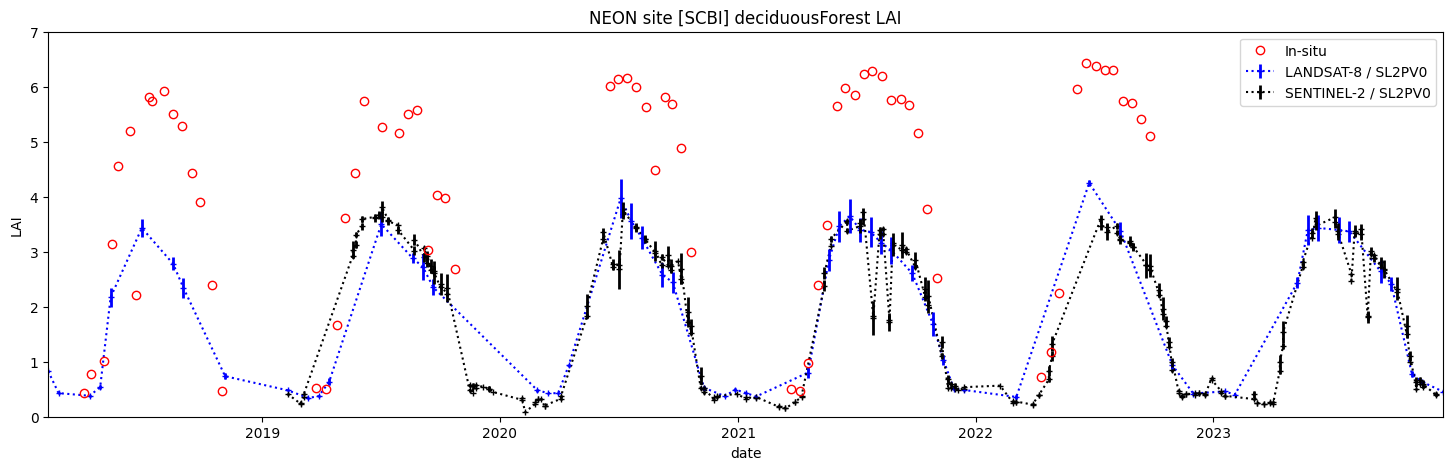

In [75]:
fig,ax = plt.subplots(1,1,figsize=[18,5])
plt.errorbar(pixelL08V0_2['utc'],pixelL08V0_2['est_mean'],pixelL08V0_2['est_std'], marker='+', markersize=4,color='b',elinewidth=2,barsabove=True,linestyle='dotted', label='LANDSAT-8 / SL2PV0')
plt.errorbar(pixelS2V0_2['utc'],pixelS2V0_2['est_mean'],pixelS2V0_2['est_std'], marker='+', markersize=4,color='k',elinewidth=2,barsabove=True,linestyle='dotted',label='SENTINEL-2 / SL2PV0')
plt.plot(MES_select['utc'],MES_select[variableName+'_total'],'or',markerfacecolor='none', label='In-situ')

plt.title('NEON site [%s] %s %s'%(fn.split('_')[0],(fn.split('_')[2]),variableName))

ax.legend()
ax.set_ylim([0,7])
ax.set_xlim([min(pixelL08V0_2['utc']),max(pixelL08V0_2['utc'])])
ax.set_xlabel('date')
ax.set_ylabel(variableName)
plt.xticks(rotation=0);

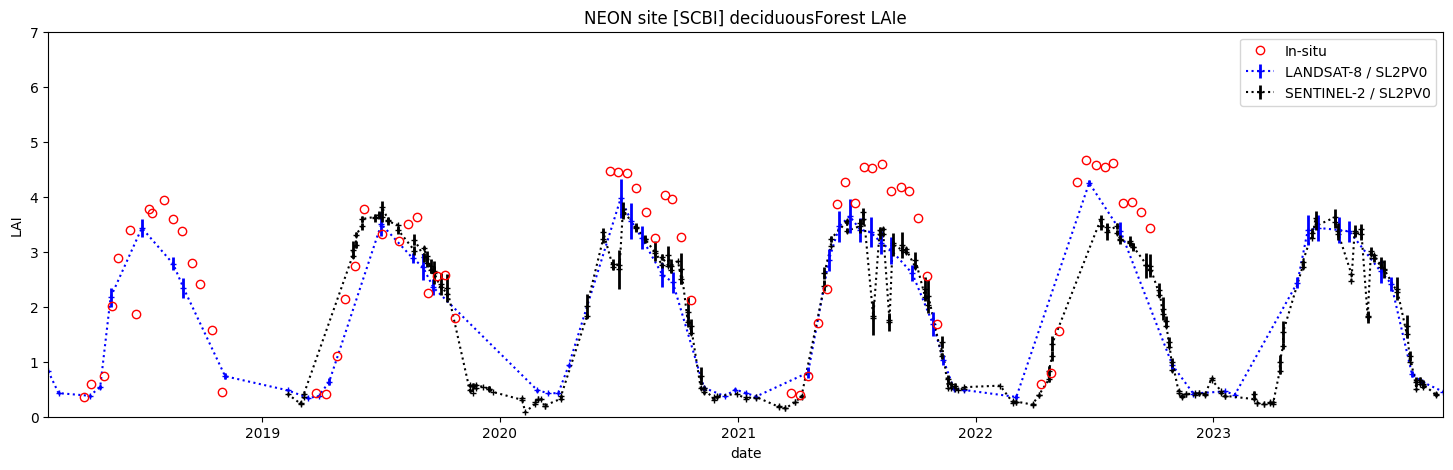

In [76]:
fig,ax = plt.subplots(1,1,figsize=[18,5])
plt.errorbar(pixelL08V0_2['utc'],pixelL08V0_2['est_mean'],pixelL08V0_2['est_std'], marker='+', markersize=4,color='b',elinewidth=2,barsabove=True,linestyle='dotted', label='LANDSAT-8 / SL2PV0')
plt.errorbar(pixelS2V0_2['utc'],pixelS2V0_2['est_mean'],pixelS2V0_2['est_std'], marker='+', markersize=4,color='k',elinewidth=2,barsabove=True,linestyle='dotted',label='SENTINEL-2 / SL2PV0')
plt.plot(MES_select['utc'],MES_select['LAIe_total'],'or',markerfacecolor='none', label='In-situ')

plt.title('NEON site [%s] %s %se'%(fn.split('_')[0],(fn.split('_')[2]),variableName))

ax.legend()
ax.set_ylim([0,7])
ax.set_xlim([min(pixelL08V0_2['utc']),max(pixelL08V0_2['utc'])])
ax.set_xlabel('date')
ax.set_ylabel('LAI')
plt.xticks(rotation=0);